# Capstone: Anomaly Detection - Step 2 Data Wrangling

Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.  

**The Data Science Method**  


1.   Problem Identification 

2.   **Data Wrangling** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
   * Data Diagnosis
      -  Data profiling
      -  Preliminary EDA
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
 
3.   Exploratory Data Analysis 

4.   Pre-processing and Training Data Development

5.   Modeling 

6.   Documentation


## Data Collection
<font color='teal'>**First, let's load the needed packages and modules into Python. Then I will load the dataset into pandas dataframe for ease of use.**</font>


In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import kaggle as kg
import requests
from pathlib import Path
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import matplotlib.pyplot as plt
import glob

<font color='teal'>**Set your working directory correctly**</font>

In [46]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\raw'

In [44]:
path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\raw'
os.chdir(path)

### DON'T RUN THE CODE IN NEXT LINE AFTER THE INITIAL RUN !!!

First, download the data set from Kaggle page https://www.kaggle.com/inIT-OWL/production-plant-data-for-condition-monitoring

In [4]:
!kaggle datasets download -d inIT-OWL/production-plant-data-for-condition-monitoring


  0%|          | 0.00/27.0M [00:00<?, ?B/s]
  4%|3         | 1.00M/27.0M [00:00<00:12, 2.09MB/s]
  7%|7         | 2.00M/27.0M [00:01<00:12, 2.07MB/s]
 11%|#1        | 3.00M/27.0M [00:01<00:11, 2.17MB/s]
 15%|#4        | 4.00M/27.0M [00:01<00:10, 2.33MB/s]
 19%|#8        | 5.00M/27.0M [00:02<00:09, 2.31MB/s]
 22%|##2       | 6.00M/27.0M [00:02<00:08, 2.55MB/s]
 26%|##5       | 7.00M/27.0M [00:02<00:07, 2.78MB/s]
 30%|##9       | 8.00M/27.0M [00:03<00:06, 3.03MB/s]
 33%|###3      | 9.00M/27.0M [00:03<00:05, 3.18MB/s]
 37%|###7      | 10.0M/27.0M [00:03<00:05, 3.33MB/s]
 41%|####      | 11.0M/27.0M [00:04<00:05, 3.15MB/s]
 45%|####4     | 12.0M/27.0M [00:04<00:05, 2.70MB/s]
 48%|####8     | 13.0M/27.0M [00:05<00:05, 2.58MB/s]
 52%|#####1    | 14.0M/27.0M [00:05<00:05, 2.27MB/s]
 56%|#####5    | 15.0M/27.0M [00:06<00:05, 2.26MB/s]
 59%|#####9    | 16.0M/27.0M [00:06<00:04, 2.44MB/s]
 63%|######3   | 17.0M/27.0M [00:06<00:03, 2.64MB/s]
 67%|######6   | 18.0M/27.0M [00:07<00:03, 2.93MB/s]
 

<font color='teal'>**Unzip the zip file to extract CSV files in the working directory**</font>

In [5]:
import zipfile
with zipfile.ZipFile('production-plant-data-for-condition-monitoring.zip', 'r') as zip_ref:
    zip_ref.extractall()

<font color='teal'>**Read CSV files into pandas dataframes**</font>

In [47]:
csv_files = glob.glob('*.csv')
print(csv_files)

['C11.csv', 'C13-1.csv', 'C13-2.csv', 'C14.csv', 'C15.csv', 'C16.csv', 'C7-1.csv', 'C7-2.csv', 'C8.csv', 'C9.csv']


In [48]:
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)

In [49]:
df = pd.concat(list_data, ignore_index=True)

In [50]:
df.shape

(228424, 26)

## Diagnosis

<font color='teal'>**Create and export data profile report using pandas-profiling package**</font>

In [8]:
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("df-profile_report.html")

<font color='teal'>**Look at the first and last 5 rows, columns and data types of the data set**</font>

In [51]:
df.head()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,-45.568737,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,-51.259983,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,-56.656587,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,-52.903776,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,-56.377452,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0


In [52]:
df.tail()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
228419,34240,-99.331815,-79.731577,-100.0,-100.0,-100.0,-100.0,-99.972898,-100.0,-80.708692,...,-97.765194,-73.324347,-82.547825,-93.710782,-26.761942,-97.60079,-61.242256,-100.0,-100.0,-100.0
228420,34241,-99.331815,-79.731577,-100.0,-100.0,-100.0,-100.0,-99.972898,-100.0,-80.708692,...,-97.765194,-73.324347,-82.547825,-93.682259,-26.952491,-97.60079,-66.277155,-100.0,-100.0,-100.0
228421,34242,-99.331815,-79.731577,-100.0,-100.0,-100.0,-100.0,-99.972898,-100.0,-80.708692,...,-97.765194,-73.324347,-82.547825,-93.682259,-25.041844,-97.60079,-66.277155,-100.0,-100.0,-100.0
228422,34243,-99.331815,-79.731577,-100.0,-100.0,-100.0,-100.0,-99.972898,-100.0,-80.708692,...,-97.765194,-73.324347,-82.547825,-93.653736,-25.026394,-97.60079,-67.061407,-100.0,-100.0,-100.0
228423,34244,-96.932422,-79.731577,-100.0,-100.0,-100.0,-100.0,-99.972898,-100.0,-80.708692,...,-97.765194,-73.324347,-82.547825,-93.653736,-26.612592,-97.60079,-67.343738,-100.0,-100.0,-100.0


In [53]:
df.columns

Index(['Timestamp', 'L_1', 'L_2', 'A_1', 'A_2', 'B_1', 'B_2', 'C_1', 'C_2',
       'A_3', 'A_4', 'B_3', 'B_4', 'C_3', 'C_4', 'L_3', 'L_4', 'L_5', 'L_6',
       'L_7', 'L_8', 'L_9', 'L_10', 'A_5', 'B_5', 'C_5'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228424 entries, 0 to 228423
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  228424 non-null  int64  
 1   L_1        228412 non-null  float64
 2   L_2        228412 non-null  float64
 3   A_1        228412 non-null  float64
 4   A_2        228412 non-null  float64
 5   B_1        228412 non-null  float64
 6   B_2        228412 non-null  float64
 7   C_1        228412 non-null  float64
 8   C_2        228412 non-null  float64
 9   A_3        228412 non-null  float64
 10  A_4        228412 non-null  float64
 11  B_3        228412 non-null  float64
 12  B_4        228412 non-null  float64
 13  C_3        228412 non-null  float64
 14  C_4        228412 non-null  float64
 15  L_3        228412 non-null  float64
 16  L_4        228412 non-null  float64
 17  L_5        228412 non-null  float64
 18  L_6        228412 non-null  float64
 19  L_7        228412 non-n

<font color='teal'>**Initial EDA**</font>

- Count of unique values
- Numeric columns
- Missing values
- Summary stats
- Outliers
    - Considerably higher or lower
    - Require further investigation

In [55]:
# Let's count the unique values of one of the columns
df['Timestamp'].value_counts(dropna=False).head()

2047    10
2125    10
1355    10
3530    10
1483    10
Name: Timestamp, dtype: int64

In [56]:
# Let's take a look at the summary statistics for all columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,228424.0,13406.915079,8989.680556,0.0,5909.000000,12254.000000,19365.000000,34697.0
L_1,228412.0,55.973554,42.782118,-100.0,55.717540,60.652999,83.037206,100.0
L_2,228412.0,14.789952,24.470182,-100.0,6.673294,15.807133,27.190257,100.0
A_1,228412.0,69.121850,29.770464,-100.0,74.723683,74.830399,74.906624,100.0
A_2,228412.0,76.068734,33.009632,-100.0,82.534583,82.613256,89.051334,100.0
B_1,228412.0,56.457228,26.990088,-100.0,55.319293,66.330331,66.425137,100.0
B_2,228412.0,76.740953,32.678891,-100.0,82.596721,82.649180,89.101639,100.0
C_1,228412.0,59.534030,27.192271,-100.0,66.420489,66.515347,66.569551,100.0
C_2,228412.0,75.947494,32.434466,-100.0,82.449702,82.541451,88.950783,100.0
A_3,228412.0,39.139038,25.561299,-100.0,38.125145,43.056525,47.259052,100.0


<font color='teal'>**Visual EDA**</font>

- Use Bar Plots for discrete data counts
- Use Histograms for continuous data counts
- Look at frequencies

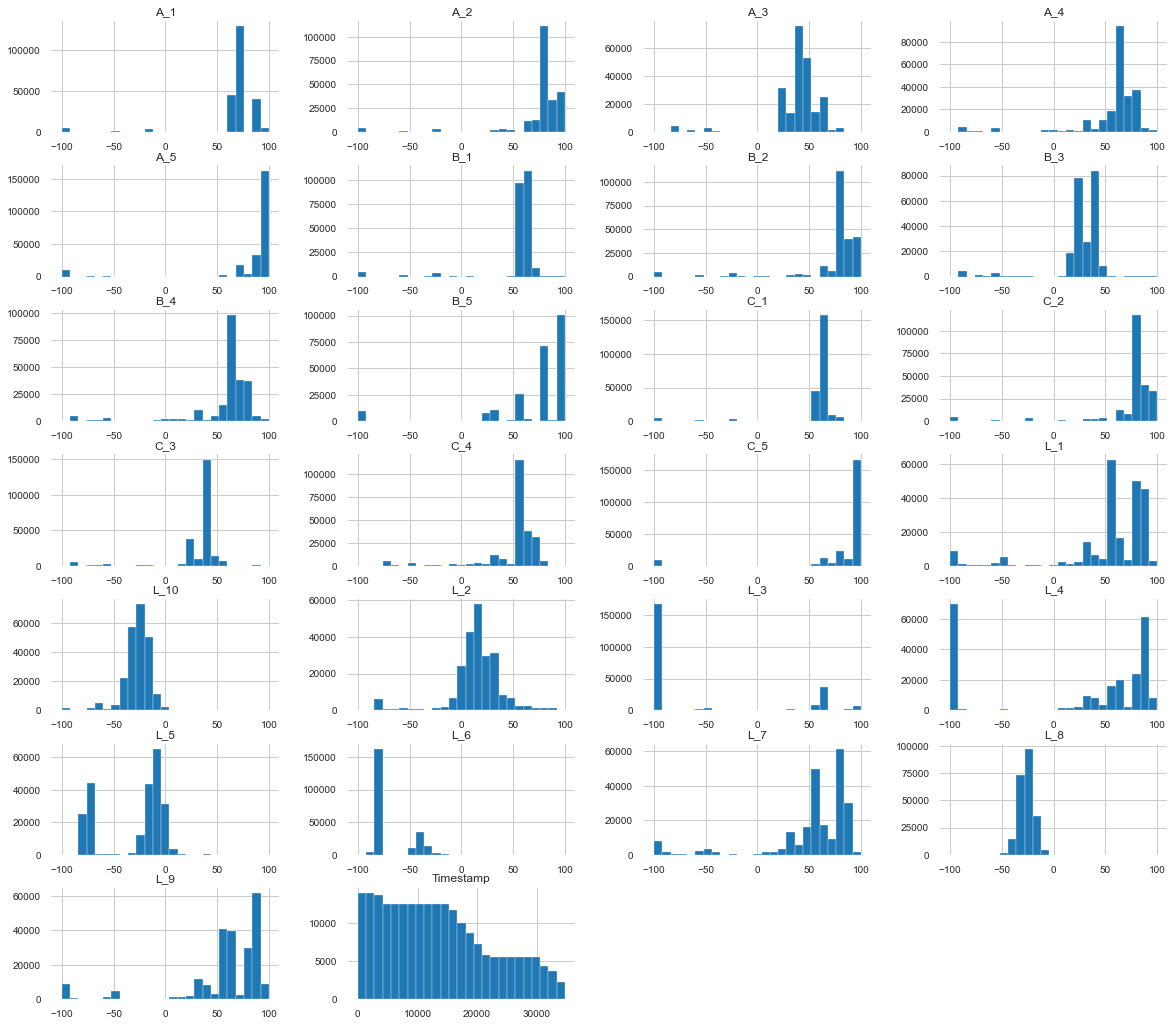

In [57]:
# Histogram
df.hist(df.columns, bins=25, layout=(7,4), figsize=(20, 18))
plt.show()

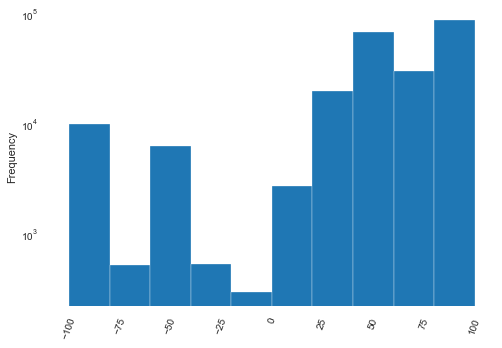

In [58]:
df['L_1'].plot(kind='hist', rot=70, logx=False, logy=True)
plt.show()

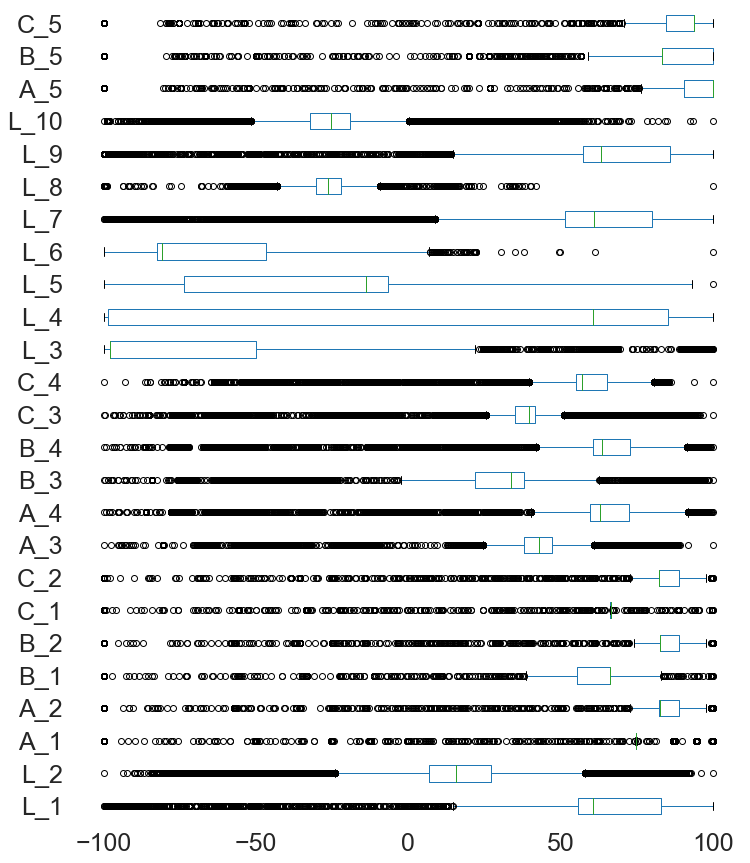

In [59]:
# Boxplots
bplot = df.drop(['Timestamp'], axis=1)
boxplots = bplot.boxplot(grid=False, vert=False,fontsize=25, figsize=(12,15))

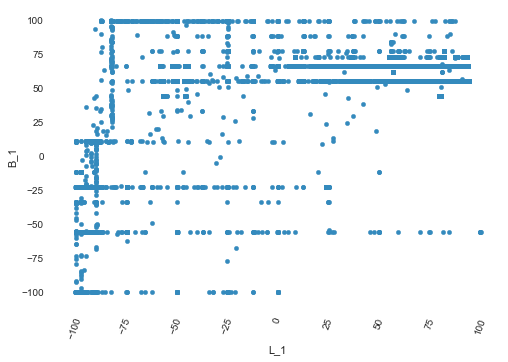

In [60]:
# Scatter plot
df.plot(kind='scatter', x='L_1', y='B_1', rot=70)
plt.show()

## Data Cleaning
- Does the columns represent seperate variables?
- Do rows represent individual observations?
- Do observational units form tables?

Keep in mind: there are data formats that are better for reporting vs. better for analysis; tidy data makes it easier to fix common data problems

<font color='teal'>**Convert timestamp column into proper datatime format**</font>

In [61]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

In [62]:
df = df.drop(['Timestamp'], axis=1)

In [63]:
df.head()

,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,A_4,...,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5,Date
0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,-45.568737,-59.348954,...,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0,1970-01-01 00:00:00
1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,-51.259983,-62.808618,...,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0,1970-01-01 00:00:01
2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,-56.656587,-66.582796,...,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0,1970-01-01 00:00:02
3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,-52.903776,-61.912250,...,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0,1970-01-01 00:00:03
4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,-56.377452,-64.239660,...,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0,1970-01-01 00:00:04


<font color='teal'>**Melt data and reshape the columns**</font>

Transform data to an analysis friendly shape as needed. Turn columns into rows.

In [64]:
# Melt the dataset and create new columns
df_melt = pd.melt(df, id_vars='Date', var_name='SensorType', value_name='SensorReading')
df_melt['SensorType'] = df_melt.SensorType.str.split('_')
df_melt['Sensor'] = df_melt.SensorType.str.get(1)
df_melt['SensorType'] = df_melt.SensorType.str.get(0)
cols = ['Date', 'SensorType', 'Sensor', 'SensorReading']
df_melt = df_melt[cols]

In [65]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710600 entries, 0 to 5710599
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   SensorType     object        
 2   Sensor         object        
 3   SensorReading  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 174.3+ MB


<font color='teal'>**Let's remove duplicates from the dataframe**</font>

In [66]:
df_melt = df_melt.drop_duplicates()

In [67]:
df_melt.shape

(5143307, 4)

<font color='teal'>**Let's convert the columns "SensorType" and "Sensor" to types category and integer respectively.
Converting "SensorType" into category data type will make the DataFrame smaller in memory and also can be utilized by other Python libraries for analysis.**</font>

In [68]:
# first check the data types of the dataframe
print(df_melt.dtypes)

Date             datetime64[ns]
SensorType               object
Sensor                   object
SensorReading           float64
dtype: object


In [69]:
df_melt['SensorType'] = df_melt['SensorType'].astype('category')
df_melt['Sensor'] = df_melt['Sensor'].astype('int')

In [70]:
print(df_melt.dtypes)

Date             datetime64[ns]
SensorType             category
Sensor                    int32
SensorReading           float64
dtype: object


In [71]:
df_melt.head()

,Date,SensorType,Sensor,SensorReading
0,1970-01-01 00:00:00,L,1,-20.470767
1,1970-01-01 00:00:01,L,1,-4.874715
2,1970-01-01 00:00:02,L,1,25.132878
3,1970-01-01 00:00:03,L,1,-90.508732
4,1970-01-01 00:00:04,L,1,-95.641610


<font color='teal'>**Let's check the count of unique values.**</font>

In [72]:
df_melt['SensorType'].value_counts()

L    2231789
B     981155
A     966366
C     963997
Name: SensorType, dtype: int64

<font color='teal'>**Let's take a look at the histogram of the data**</font>

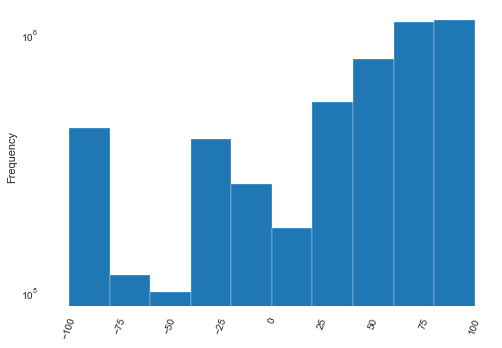

In [73]:
df_melt['SensorReading'].plot(kind='hist', rot=70, logy=True)
plt.show()

<font color='teal'>**Let's take a look at the boxplot of the data to see if there are any outliers**</font>

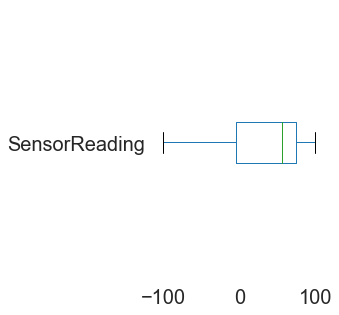

In [75]:
# Boxplot
tidy = df_melt.drop(['Date', 'Sensor'], axis=1)
boxplots = tidy.boxplot(grid=False, vert=False,fontsize=20, figsize=(3,5))

<font color='teal'>**Let's export the tidy data into a CSV file to be used for analysis**</font>

In [76]:
path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\interim'
os.chdir(path)

In [77]:
# Write the dataframe to csv 
df_melt.to_csv('step2_output.csv')